# Pre-class Assignment: Project Brainstorming & Graph Theory and Cell Towers
# Day 11 
# CMSE 202 

In this pre-class assignment you will work to develop a program to generate a **graph** from a set of points on an XY-plane using the nearest neighbor graphing algorithm. This will set the stage for work that we will do in-class where you will work with your group to solve the problem of assigning cell phone tower frequencies and visualizing them as a graph. You'll being using `networkx` to create a `Graph()` object that you can manipulate to accomplish this task.

**Before** you get to that part though, you're going to spend a little time brainstorming possible project ideas.

## <p style="text-align: right;"> &#9989; Connor Sugrue</p>

## Goals for today's pre-class assignment

1. **Project brainstorming**
1. Create a function for finding the nearest neighbor for a given node in a graph.
1. Make a simple Graph Theory graph using matplotlib
1. Experiment with the `networkx` module

## Assignment instructions
**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" dropbox folder in the Desire2Learn website.

**Notes about the assignment**: The most important pieces of the second part of this assignment (the graph theory component) are Steps 1 and 2. Step 3 might be a bit challenging because you have to figure out the right syntax to get the NetworkX module to work. Feel free to discuss issues you run into with others on Slack. It's OK if you can't get Part 3 figured out before class as long as you've tried it. Make sure you complete the final part of the assignment where you're asked to come up with an outline for how you would solve the cell phone tower problem.

---
# 1. Project Brainstorming

We would like you to start thinking about your semester project.  Ideally, your project will incorporate the concepts that you have been learning and will eventually learn in the course. You can find details about what is expected of you for the semester projects [here](https://msu-cmse-courses.github.io/cmse202-S23-jb/course_materials/SemesterProjectDetails.html)

Right now the goal is to just come up with project ideas that sound interesting to you! Later, we'll work together to shape them into concepts that fit well within the bounds of the course!

You may also find it useful to consider the following examples from previous semesters:

### Example 1: Agent based spread of disease
This group developed an agent based model to study the spread of a disease. The model consisted of people that lived, worked and went to school.  The interaction between the agents determined the likelihood of the spread of the virus. 

<img src="https://i.ibb.co/MMZ2ksB/name-019.jpg" alt="name-019" border="0" width=500></a>

### Example 2: Planetary Habitable_zone
This project developed an API (advanced programming interface) to existing online databases of exoplanets (planets outside of our solar system). The user could query the database and the program would generate an idealized picture of the solar system and show if the planet is inside the "goldilock zone." This is the zone where a planet is likely to sustain liquid water.  

<img src="https://i.ibb.co/qYY2XNw/Kepler-47.png" alt="Kepler-47" border="0" width=400>
<img src="https://i.ibb.co/0Ds21KJ/Habitable-zone.png" alt="Habitable-zone" border="0" width=400>

### Example 3: Star Spectral Analysis
This project developed an algorithm to automatically categorize stars based on their visible spectral signatures.  This categorization process is often difficult and the students wanted to see if a model could be generated using a learning algorithm.

<img src="https://i.ibb.co/bFvqRFk/Spectra.png" alt="Spectra" border="0" width=400>


### Example 4: Image Classification of Filamentous Fungi
This project involved the creation of a image classifier using machine learning to classify images of fungi to the correct phylum based on microscope images. It was intended to improve the efficiency of identifying unknown fungi isolated from soil. Currently there are 248 images in the database.

<img src="https://i.ibb.co/XLB43MJ/hyphal-image-classification.png" alt="hyphal-image-classification" border="0" width=900>


### Example 5: Prediction of NFL draft first pick

This project involved the creation of three model in order to predict who will be picked first in the NFL draft. The students used an SVM, Perceptron, and Logistic regression to predict the first picks.

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/80/NFL_Draft_logo.svg/1920px-NFL_Draft_logo.svg.png" width=400>

### And many more! 

Other past projects have used a variety of models and data analysis techniques to look at things like:
* What factors influence how often people take their dog to the dog park?
* What's the best way to build your stock portfolio to maximize performance?
* How can rumors, memes, and reddit influence stock performance?
* How has basketball as a sport evolved as a function of time?
* Is it possible to predict which teams will will the NHL Stanley Cup?
* How do various hormones influence brain chemistry?
* Which blackjack betting strategy leads to the most wins?
* How do you build an accurate orbital model of the solar system? Other planetary systems?
* How does currently available data help us understand the causes and impacts of climate change?
* Is it possible to automatically detect shipping boats in satellite images?
* How has the rise and fall of COVID cases effected the stock market?
* How can network graphs be used to find the shortest past through a city?
* How accurately can a neural network perform image recognition?
* Can an agent-based model accurately model local animal populations?

**&#9989;  Do This:** Now that you've had a chance to think about some examples of past project, **brainstorm ideas you have for projects**. These can be rough, general ideas.


<font size=+3>&#9998;</font> I like the idea of learning towards financial applications. So maybe predictions of crypto value in a certain amount of time, based on media opinion. Or, the probability of a person losing money gambling based on factors of whether or not they have been winning or losing blackjack hands.

**Once you've come up with some ideas for project, fill out the following survey so that your ideas can be compiled into list of possible ideas for the entire class**. The combined list will be used to seed ideas that will eventually lead to semester projects!

In [1]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/DscnvS7ai2"
	width="900px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---
# 2. Application of Graph Theory

## Defining the problem

The signals from different cellphone towers that are close together can interfere.  

<img src="http://2.bp.blogspot.com/-X7XJfnPb6xU/TjZfTmAd9CI/AAAAAAAAAF0/3eGarXigOQE/s1600/dido1.jpg" width="500px"><p style="text-align: right;">From: http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

In order to avoid this overlap cell phone companies use different frequency ranges in the Electromagnetic spectrum.  Two towers that are close together but have differences in frequencies (shown as colors, red/green/black in the following figure) do not cause nearly as much interference. 

<img src="http://2.bp.blogspot.com/-M4olRy6O-v4/TjZghvwq3KI/AAAAAAAAAF4/GtOd6Db-su4/s1600/dido2.jpg" width = "500px"><p style="text-align: right;">From:  http://www.onlivespot.com/2011/08/dido-wireless-technology-explained.html</p>

However, cellphone towers are never distributed in such an even pattern.   Consider the following map which shows the location of cell towers around Michigan State. (Note: this map may have changed since the time it was first created.)

<img src='https://i.imgur.com/oUuUDCH.jpg' width = "500px">
<p style="text-align: right;">From: http://www.antennasearch.com/</p>

Another problem is that cellphone companies have to pay for each frequency range they use. So they would like to minimize the number of frequencies that they need to purchase while also minimizing the interference between the cell towers. 

Between this pre-class assignment and the assignment you'll do in class, we'll try to solve this cell phone tower problem using **Graph Theory**!

## Step 1: Generate random cell towers. 

To start out, we're going to keep things simple and use artificial data to create our cell phone tower network. Specifically, we'll just populate a network of towers randomly.

**&#9989;  Do This:** **Write a function** to randomly create a 2D numpy array with $N$ rows representing cell towers and 2 columns representing the $x$ (longitude) and $y$ (latitude) positions of the cell towers on a map. You may assume that the map is a 2D plane and not a sphere. You can also assume that the "latitude" and "longitude" values are all in the range of 0 to 1.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random
def towers(number_towers):
    location_towers = np.random.random((number_towers,2))
    return location_towers


**&#9989;  Do This:** Generate $N=50$ towers using your above function and plot the results as a scatter plot. It should look something like this (though your points will be in different positions):

<div align="center"><img src="https://i.ibb.co/yBH8X18/random-towers.png" alt="random_towers" border="0"></div>

Text(0.5, 1.0, 'Randomly Generated Cell Towers')

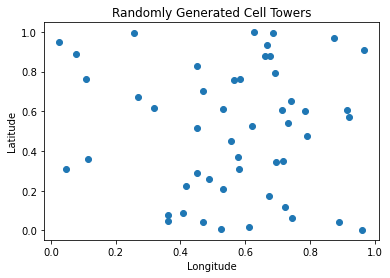

In [63]:
# Put your code here.
plt.scatter(towers(50)[:,0],tower_generator(50)[:,1])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Randomly Generated Cell Towers")

## Step 2: Nearest Neighbor Graph

Next, we're going to **write a function that returns an adjacency list** (implemented as a dictionary of lists) from this set of points using the Nearest Neighbor Graph algorithm.  More information about the algorithm can be found here:

https://en.wikipedia.org/wiki/Nearest_neighbor_graph

Basically, the algorithm should **loop though all of the points** and **find the nearest neighbor to each point**. To do this, you can use the `distance` function that is provided below, or you can take your own approach.

Again, for **each point**, we're going to check the distance to **all other points** and **find the one that is the closest**. 

In [64]:
import math
# Function for computing the distance between two points
def distance(p1,p2):
    '''Returns the distance betwen two numpy points'''
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Put your nearest neighbor graph function here

**&#9989; 2.1  Do This:** Start by writing a piece of code that takes the first data point in the array from Step 1 and uses the `distance` function to find the point closest (smallest distance).

In [96]:
#Write your code here
distance(towers(50)[0],towers(50)[1])

0.5924521919483287

**&#9989; 2.2  Do This:** Now extend your code so that it runs over all data points (not just the first) and finds the nearest neighbor. Make sure to store the nearest neighbor in either a list or a dictionary. 

**Note**: this isn't a trivial function, so don't worry if you can't quite get it figured out. Do your best to work through the logic and implement a solution. If you get stuck, try to make a note of where you got stuck and include this in your follow-up survey.

In [97]:
#Write your code here
for i in range(len(towers(50))):
    distance(towers(50)[i], towers(50)[i+1])

IndexError: index 50 is out of bounds for axis 0 with size 50

**&#9989;  Do This:** Run your nearest neighbor graphing function on the points you generated in step 1.  Generate a plot of the points and include the 
edges of the graph. Your plot should look something like the following:

<div align="center"><img src="https://i.ibb.co/ZBfqYhs/nn-graph.png" alt="nn-graph" border="0"></div>

In [ ]:
#Write your code here

---
# Preparing for the in-class assignment

Finally, think about how you would solve the cell phone tower problem discussed in the beginning of the assignment.  Outline a program to do the following:

1. Generate a list of xy points from the longitude and latitude given by a list of cell towers.
2. Run the Nearest Neighbor graph algorithm to generate a graph.
3. Plot the resulting map 

You can outline the program in the cell below using "stub" functions where you define the functions you think you'll need, what the inputs will be for the functions, and some comments for what the functions will do. If you end the function with ```pass```, Python will be able to successfully "run" your code. An example of what is meant by as stub function is included below. **This is just an outline to guide your thinking when you get to class, it doesn't have to be perfect!**

In [ ]:
# Example "stub" function
def stubby(param1, param2, param3):
    '''
    This function takes input parameters and
    uses them to compute things and make plots.
    '''
    pass

#
# Using stub functions, put your outline for your program below this comment block.
# Make sure to include comments about what the inputs are and what the functions need to do.
#



---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. Do you have any questions about the semester projects at this time? If so, what are they?

----
# Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [98]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for this assignment's submission folder (Don't forget to add your names in the first cell).

&#169; Copyright 2021,  Department of Computational Mathematics, Science and Engineering at Michigan State University